In [2]:
#loading data 
from pylab import *
import h5py
from filterMasks import filterMasks
h5FileName="smallHdf5Data/sxri0414run60.h5"
experimentRunName = h5FileName.split("/")[1][:-3]
f=h5py.File(h5FileName)
myMask=filterMasks.__dict__[experimentRunName](f)

filterMasks/filterMasks.py:16: RuntimeWarning: invalid value encountered in greater
  myMask = myMask * (array(myDict['gas_detector']['f_11_ENRC'])>1)


In [37]:
#histograming and showing non-linearity between detectors
xEdges =arange(0,.0012,.00002)
yEdges = arange(0,1,0.01)
#y,x = histogram(array(f['acqiris2'][myMask]),bins=yEdges,weights=array(f['GMD'][myMask]))
y,x = histogram(array(f['GMD'][myMask]),bins=xEdges,weights=array(f['acqiris2'][myMask]))
yWeights,x = histogram(array(f['GMD'][myMask]),bins=xEdges)
myFit = polyfit(y/yWeights,x[:-1],5)

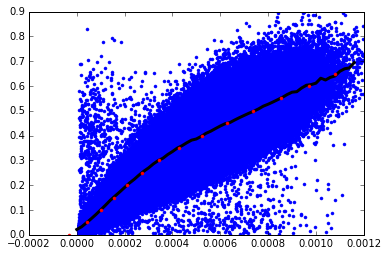

In [56]:
#plotting the data
plot(f['GMD'][myMask],f['acqiris2'][myMask],'.')
plot(x[:-1],y/yWeights,color='k',linewidth=3)
plot(poly1d(myFit)(arange(0,0.7,0.05)),arange(0,0.7,0.05),color='r',marker='.',linestyle='None')
show()

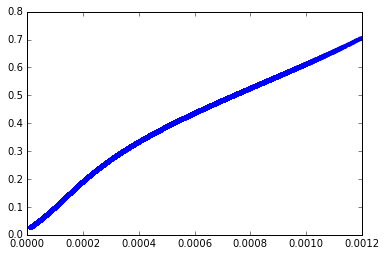

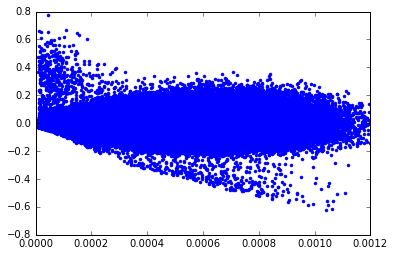

In [94]:
#showing heteroskedacity of residuals

myRoots  = array([roots(poly1d(myFit)-i) for i in f['GMD'][myMask]])
myRoot = array([i[argmin(abs(imag(i)))] for i in myRoots])
plot(f['GMD'][myMask],myRoot,'.')
show()
plot(f['GMD'][myMask],f['acqiris2'][myMask]-myRoot,'.')
show()

In [117]:
xEdges = arange(0,0.0012,0.00001)
yEdges = arange(-0.4,0.4,.01)
H,xedges,yedges= histogram2d(f['GMD'][myMask],real(f['acqiris2'][myMask]-myRoot),bins=(xEdges,yEdges))

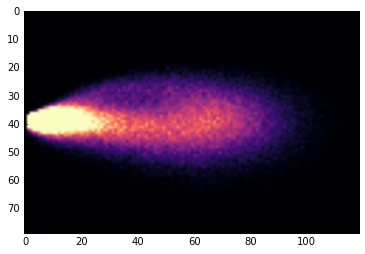

In [118]:
imshow(H.transpose(),cmap='magma',clim=(0,162))
show()